# How to Load CSV and Numpy File Types in TensorFlow 2.0



## Learning Objectives

1. Load a CSV file into a `tf.data.Dataset`. 
2. Load Numpy data




## Introduction 

In this lab, you load CSV data from a file into a `tf.data.Dataset`.  This tutorial provides an example of loading data from NumPy arrays into a `tf.data.Dataset` you also load text data.

Each learning objective will correspond to a __#TODO__ in this student lab notebook -- try to complete this notebook first and then review [the solution notebook](https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/machine_learning/deepdive2/introduction_to_tensorflow/solutions/load_diff_filedata.ipynb).

In [1]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
print("TensorFlow version: ",tf.version.VERSION)

TensorFlow version:  2.7.0


In [2]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [3]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')
abalone_labels

0        7
1        6
2       14
3       16
4       13
        ..
3315    15
3316    10
3317    11
3318    16
3319    19
Name: Age, Length: 3320, dtype: int64

In [4]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [5]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

In [6]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 646us/step - loss: 65.3154
Epoch 2/10
104/104 [==============================] - 0s 623us/step - loss: 12.6824
Epoch 3/10
104/104 [==============================] - 0s 618us/step - loss: 8.9503
Epoch 4/10
104/104 [==============================] - 0s 619us/step - loss: 8.3923
Epoch 5/10
104/104 [==============================] - 0s 624us/step - loss: 7.8838
Epoch 6/10
104/104 [==============================] - 0s 619us/step - loss: 7.4780
Epoch 7/10
104/104 [==============================] - 0s 637us/step - loss: 7.1471
Epoch 8/10
104/104 [==============================] - 0s 629us/step - loss: 6.9204
Epoch 9/10
104/104 [==============================] - 0s 626us/step - loss: 6.7462
Epoch 10/10
104/104 [==============================] - 0s 640us/step - loss: 6.6221


In [7]:
normalize = layers.Normalization()

In [8]:
normalize.adapt(abalone_features)

In [9]:
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                           optimizer = tf.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 669us/step - loss: 92.8696
Epoch 2/10
104/104 [==============================] - 0s 648us/step - loss: 54.3813
Epoch 3/10
104/104 [==============================] - 0s 642us/step - loss: 16.7819
Epoch 4/10
104/104 [==============================] - 0s 650us/step - loss: 5.8358
Epoch 5/10
104/104 [==============================] - 0s 651us/step - loss: 5.0564
Epoch 6/10
104/104 [==============================] - 0s 651us/step - loss: 5.0240
Epoch 7/10
104/104 [==============================] - 0s 647us/step - loss: 4.9831
Epoch 8/10
104/104 [==============================] - 0s 658us/step - loss: 4.9836
Epoch 9/10
104/104 [==============================] - 0s 655us/step - loss: 4.9829
Epoch 10/10
104/104 [==============================] - 0s 666us/step - loss: 4.9501


# tf.data

In [10]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [11]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [12]:
# Create a symbolic input, bu konun csv ile ilgisi yok direk calc hesabi yapmayi gosteriyor
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [13]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [14]:
print(calc(1).numpy())
print(calc(2).numpy())
print(calc(3).numpy())
print(calc(4).numpy())

3.0
5.0
7.0
9.0


In [15]:
inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [16]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>

In [17]:
preprocessed_inputs = [all_numeric_inputs]

In [18]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

In [19]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [20]:
titanic_features_dict = {name: np.array(value) 
                         for name, value in titanic_features.items()}

In [21]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [22]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 1ms/step - loss: 0.6645
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 0.5561
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 0.5001
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4706
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4524
Epoch 6/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4403
Epoch 7/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4329
Epoch 8/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4287
Epoch 9/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4248
Epoch 10/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4229


In [23]:
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

INFO:tensorflow:Assets written to: test/assets


In [24]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.866]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.866]], shape=(1, 1), dtype=float32)


In [25]:
import itertools

def slices(features):
  for i in itertools.count():
    # For each feature take index `i`
    example = {name:values[i] for name, values in features.items()}
    yield example

In [26]:
for example in slices(titanic_features_dict):
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [30]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

In [31]:
for example in features_ds:
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


In [32]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

In [33]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

In [34]:
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4232
Epoch 2/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4225
Epoch 3/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4221
Epoch 4/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4201
Epoch 5/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4208


# FROM A SINGLE FILE

In [35]:
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

In [36]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artificially small to make examples easier to show.
    label_name='survived',
    num_epochs=1,
    ignore_errors=True,)

In [37]:
for batch, label in titanic_csv_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value}")
    print()
    print(f"{'label':20s}: {label}")

sex                 : [b'male' b'male' b'male' b'female' b'male']
age                 : [28. 48. 38. 24. 28.]
n_siblings_spouses  : [0 1 0 0 1]
parch               : [0 0 1 0 0]
fare                : [  7.229  52.    153.462  13.     16.1  ]
class               : [b'Third' b'First' b'First' b'Second' b'Third']
deck                : [b'unknown' b'C' b'C' b'F' b'unknown']
embark_town         : [b'Cherbourg' b'Southampton' b'Southampton' b'Southampton' b'Southampton']
alone               : [b'y' b'n' b'n' b'y' b'n']

label               : [0 1 0 1 0]


In [38]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz', 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic')

417792/405373 [==============================] - 1s 3us/step


In [39]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP")

for batch, label in traffic_volume_csv_gz_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value[:5]}")
  print()
  print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [252.77 296.18 268.58 279.8  293.71]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [100  20  90  90   0]
weather_main        : [b'Clouds' b'Clouds' b'Snow' b'Clouds' b'Clear']
weather_description : [b'overcast clouds' b'few clouds' b'heavy snow' b'overcast clouds'
 b'Sky is Clear']
date_time           : [b'2013-02-01 01:00:00' b'2013-07-13 09:00:00' b'2012-12-29 14:00:00'
 b'2013-05-05 21:00:00' b'2013-08-20 02:00:00']

label               : [ 378 3356 4240 2467  294]


In [40]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: user 12.2 s, sys: 2.75 s, total: 15 s
Wall time: 9.62 s


In [41]:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: user 1.27 s, sys: 155 ms, total: 1.43 s
Wall time: 1.2 s


In [42]:
%%time
snapshot = tf.data.experimental.snapshot('titanic.tfsnap')
snapshotting = traffic_volume_csv_gz_ds.apply(snapshot).shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

Instructions for updating:
Use `tf.data.Dataset.snapshot(...)`.
...............................................................................................
CPU times: user 1.82 s, sys: 430 ms, total: 2.25 s
Wall time: 1.42 s


# Multiple files
All the examples so far in this section could easily be done without tf.data. One place where tf.data can really simplify things is when dealing with collections of files.



In [43]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',  "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='fonts',
    extract=True)

160325632/160313983 [==============================] - 911s 6us/step


In [44]:
import pathlib
font_csvs =  sorted(str(p) for p in pathlib.Path('fonts').glob("*.csv"))

font_csvs[:10]

['fonts/AGENCY.csv',
 'fonts/ARIAL.csv',
 'fonts/BAITI.csv',
 'fonts/BANKGOTHIC.csv',
 'fonts/BASKERVILLE.csv',
 'fonts/BAUHAUS.csv',
 'fonts/BELL.csv',
 'fonts/BERLIN.csv',
 'fonts/BERNARD.csv',
 'fonts/BITSTREAMVERA.csv']

In [45]:
len(font_csvs)

153

In [46]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=10, num_epochs=1,
    num_parallel_reads=20,
    shuffle_buffer_size=10000)

In [47]:
for features in fonts_ds.take(1):
  for i, (name, value) in enumerate(features.items()):
    if i>15:
      break
    print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'SWIS721' b'MONOTYPE' b'MAIANDRA' b'TW' b'SYLFAEN' b'VIVALDI'
 b'MAIANDRA' b'SWIS721' b'SWIS721' b'TW']
fontVariant         : [b'SWIS721 LTEX BT' b'MONOTYPE CORSIVA' b'MAIANDRA GD'
 b'TW CEN MT CONDENSED EXTRA BOLD' b'SYLFAEN' b'VIVALDI' b'MAIANDRA GD'
 b'SWIS721 LTEX BT' b'SWIS721 LTEX BT' b'TW CEN MT CONDENSED EXTRA BOLD']
m_label             : [ 203  331  262  282 1380  230  231   96  188  354]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [0 0 0 0 0 0 1 1 0 0]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [23 53 23 23 58 54 52 34 36 37]
m_left              : [26 25 23 24 22 19 25 46 24 21]
originalH           : [61 45 62 58 48 27 47 10 50 63]
originalW           : [37 27 38 22 36 44 33  9 63 24]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [  1   1   1  96 149   1   1 255   1 255]
r0c1                : [  

In [48]:
import re

def make_images(features):
  image = [None]*400
  new_feats = {}

  for name, value in features.items():
    match = re.match('r(\d+)c(\d+)', name)
    if match:
      image[int(match.group(1))*20+int(match.group(2))] = value
    else:
      new_feats[name] = value

  image = tf.stack(image, axis=0)
  image = tf.reshape(image, [20, 20, -1])
  new_feats['image'] = image

  return new_feats

In [49]:
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
  break

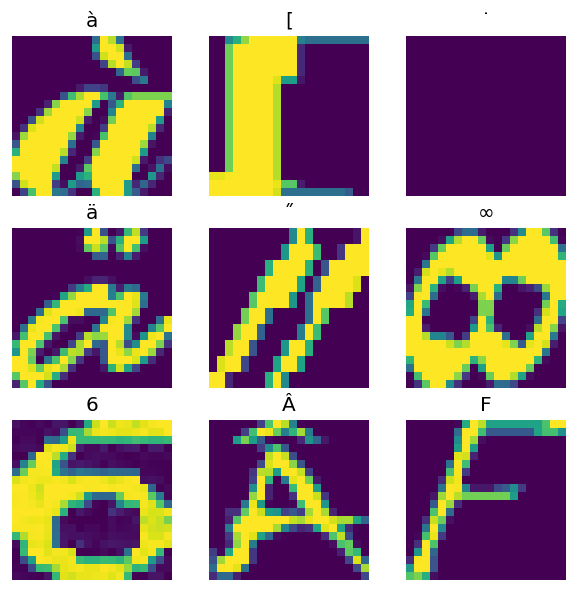

In [50]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=120)

for n in range(9):
  plt.subplot(3,3,n+1)
  plt.imshow(features['image'][..., n])
  plt.title(chr(features['m_label'][n]))
  plt.axis('off')